In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import time
import snscrape.modules.twitter as sntwitter

In [3]:
df = pd.read_csv("NationalAndStatePregnancy_PublicUse.csv")
df1 = df[['state','year','abortionrate2024']]

In [4]:
df1.head()

,state,year,abortionrate2024
0,AL,1988,40.5
1,AL,1992,38.1
2,AL,1996,34.6
3,AL,2000,29.6
4,AL,2005,23.2


In [5]:
df2=df1.sort_values("year")
df2 = df2.loc[(df2['state'] != 'US')]

In [6]:
fig = px.choropleth(df2,
                    locations='state', 
                    locationmode="USA-states", 
                    color='abortionrate2024',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='year') 

fig.show()

In [7]:
fig.update_layout(
      title_text = '20-24 years old abortion rate',
      title_font_family="Times New Roman",
      title_font_size = 30,
      title_font_color="black", 
      title_x=0.45, 
         )

In [10]:
df_tw = pd.read_csv('analyzed_tweet_merged.csv')

In [11]:
df_tw['city'].value_counts()

New York City    2468
Los Angeles      2328
Chicago          2008
Seattle          1655
Name: city, dtype: int64

In [12]:
df_ny = df_tw[df_tw['city'] == 'Seattle']
df_ny['sentiment'].value_counts()

Negative    1176
Neutral      422
Positive      57
Name: sentiment, dtype: int64

In [13]:
data = {'name': ['New York City', 'Chicago', 'Los Angeles', 'Seattle'],
        'lat': [40.7128, 41.8781, 34.052235, 47.608013],
        'lon': [-74.006, -87.6298, -118.243683, -122.335167],
        'pop': [108*5, 112*5, 75*5, 57*5]
        }
df = pd.DataFrame(data)


In [14]:


df['text'] = df['name'] + '<br>Number of positive tweets '+ (df['pop']/5).astype(str)
limits = [(0,1),(1,2),(2,4)]
colors = ["royalblue","crimson","orange"]
cities = []


fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Number of positive tweets',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

Word Cloud

In [15]:
#reload the data
df = pd.read_csv('analyzed_tweet_merged.csv')

In [16]:
## cleaning function
def preprocess(sentence):
    words = []
    for word in sentence.split():
        if word.startswith('@') and len(word) > 1:
            word = ''
        elif word.startswith('http'):
            word = 'http'
        words.append(word)
    tweets_processed = " ".join(words)
    return tweets_processed

df['tweet_processed'] = df.apply(lambda x: preprocess(x.Tweet), axis = 1)
df.head()

,Unnamed: 0,Date,Tweet,latitude,longitude,city,sentiment,tweet_processed
0,0,2022-01-31,"Nazis, banned books, suppressed voting rights,...",40.7128,-74.006,New York City,Negative,"Nazis, banned books, suppressed voting rights,..."
1,1,2022-01-31,@SenatorLankford In case you haven't noticed a...,40.7128,-74.006,New York City,Neutral,In case you haven't noticed abortion is LEGAL...
2,2,2022-01-31,@SenatorLankford So you support pushing aborti...,40.7128,-74.006,New York City,Negative,So you support pushing abortion underground?
3,3,2022-01-31,@RayRiosy @Gdad1 @ltwlauren @AngelMHart417 @Ji...,40.7128,-74.006,New York City,Neutral,Not to mention abortion- whi...
4,4,2022-01-31,@alicee_pll @miaana_14 People who support the ...,40.7128,-74.006,New York City,Negative,People who support the pro abortion movement...


In [17]:
## get 3 series with positive, negative and neutral label
df_pos = df[df['sentiment'] == 'Positive']
df_pos_text = df_pos['tweet_processed']
df_neg = df[df['sentiment'] == 'Negative']
df_neg_text = df_neg['tweet_processed']
df_neu = df[df['sentiment'] == 'Neutral']
df_neu_text = df_neu['tweet_processed']
string_pos = pd.Series(df_pos_text).str.cat(sep=' ')
string_neg = pd.Series(df_neg_text).str.cat(sep=' ')
string_neu = pd.Series(df_neu_text).str.cat(sep=' ')

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
##customed stopwprds
stopwords.update(["u",'will','amp',"abortion",'m','t','s',"abortions",'Please']) 

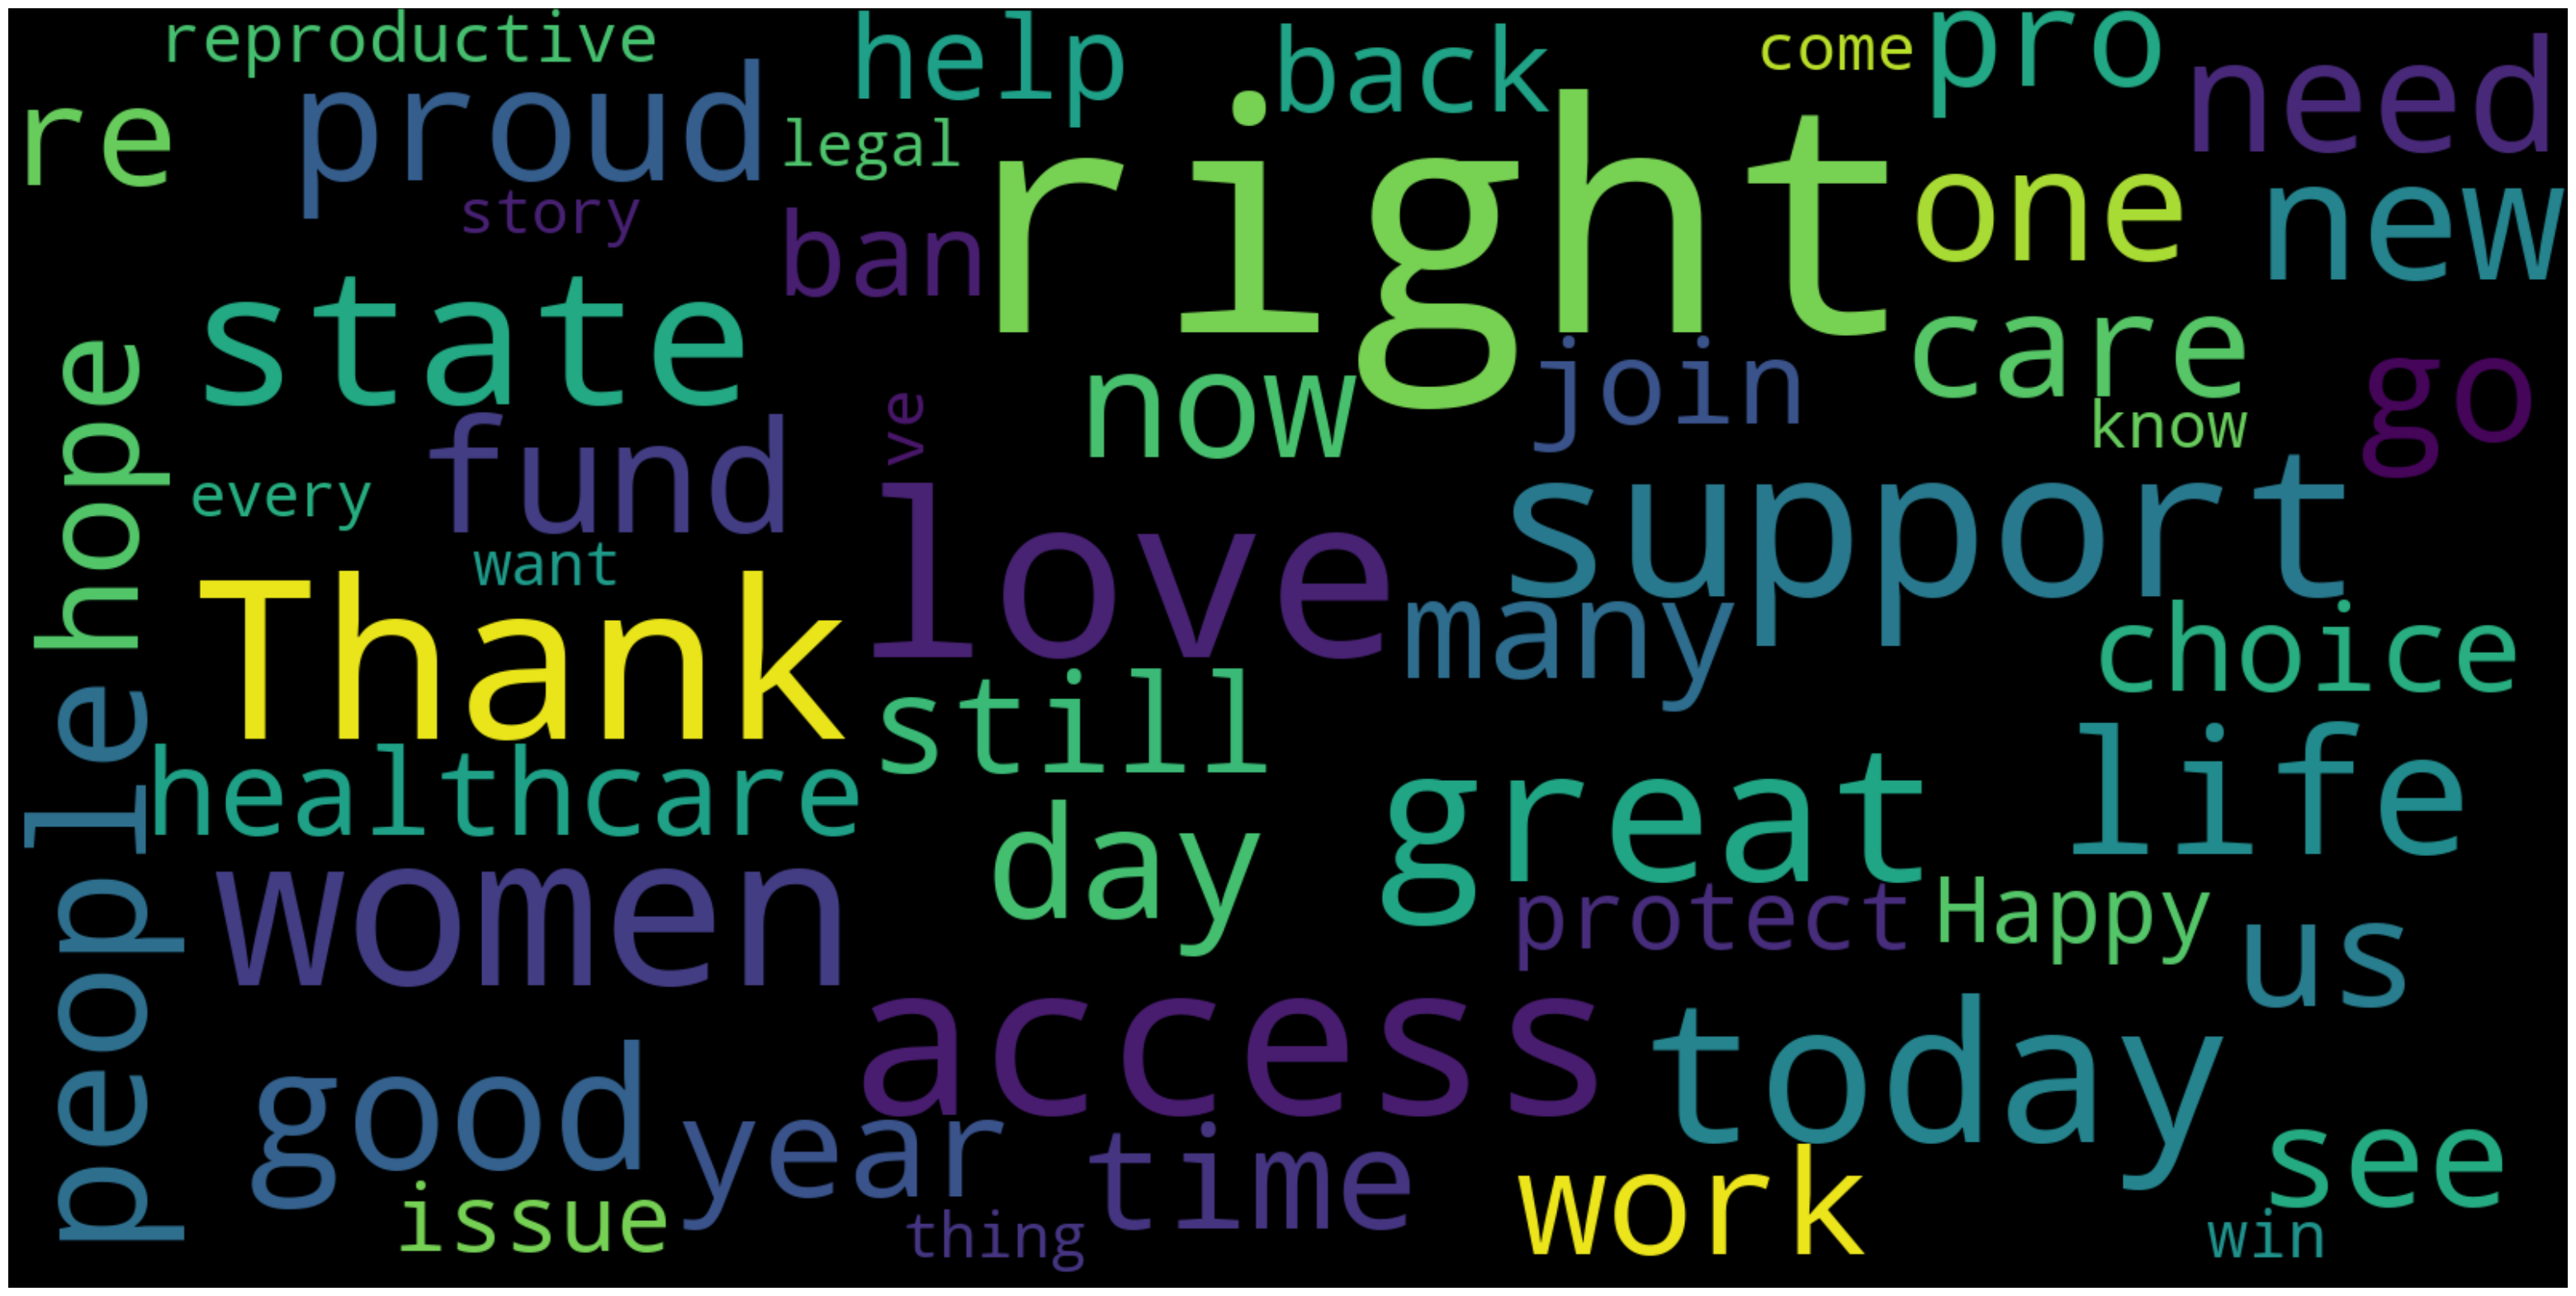

In [19]:
## cloud for postive tweets
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string_pos)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

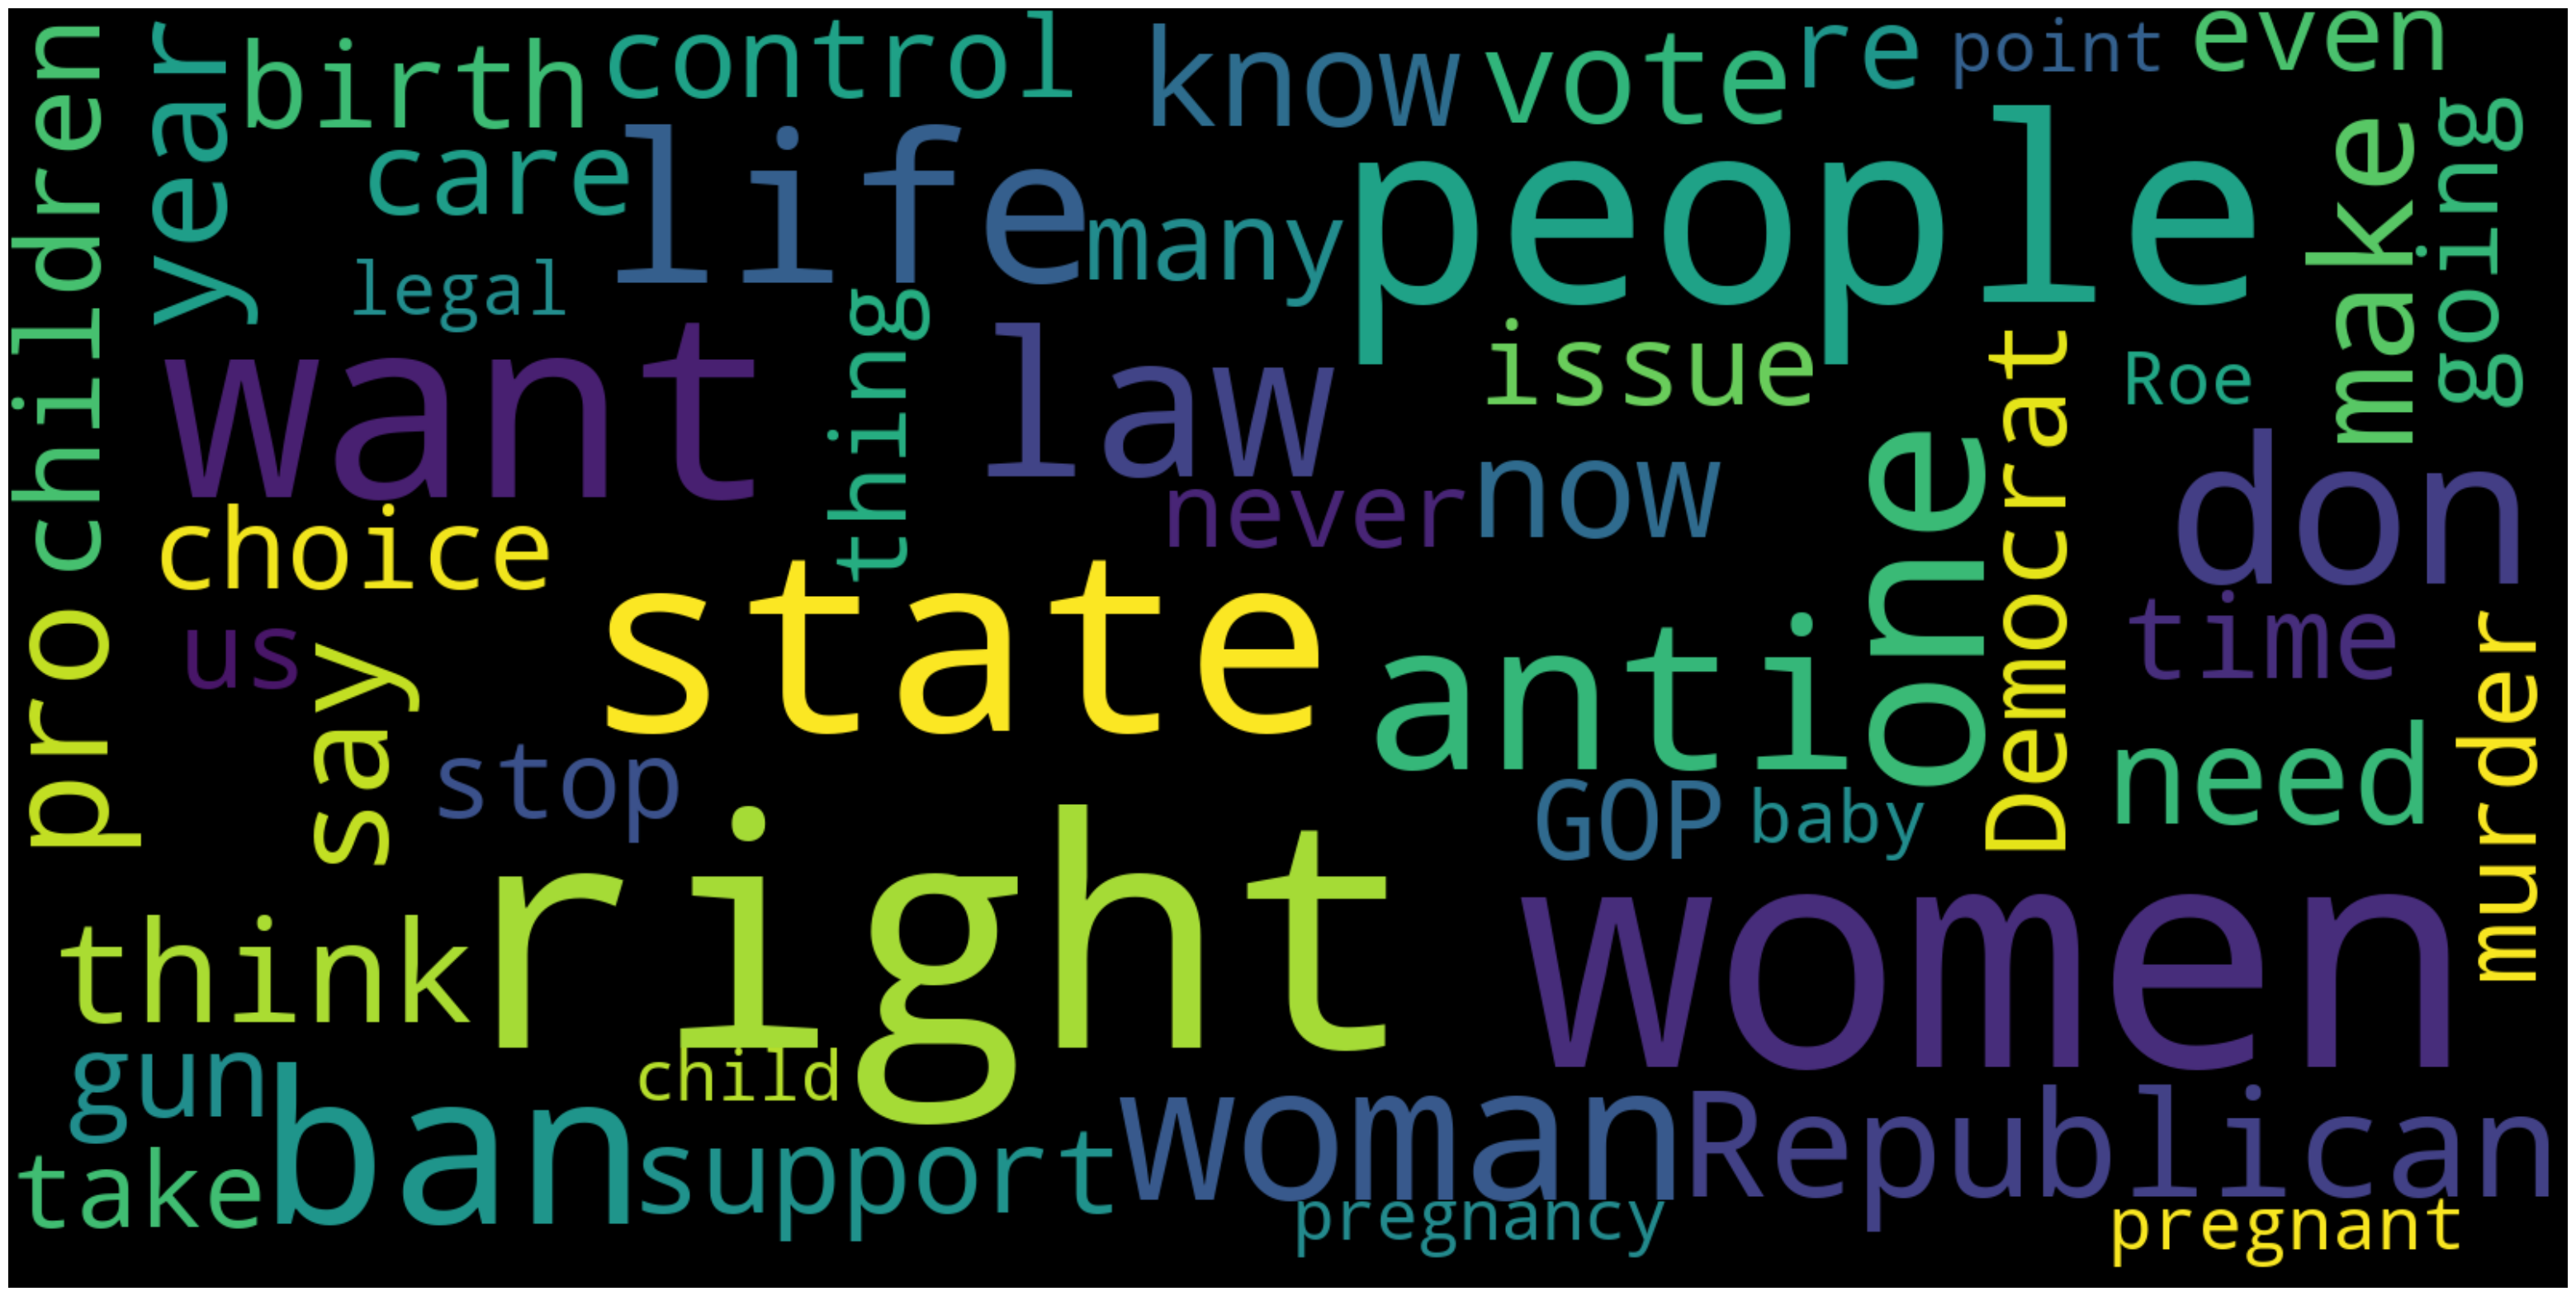

In [20]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string_neg)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

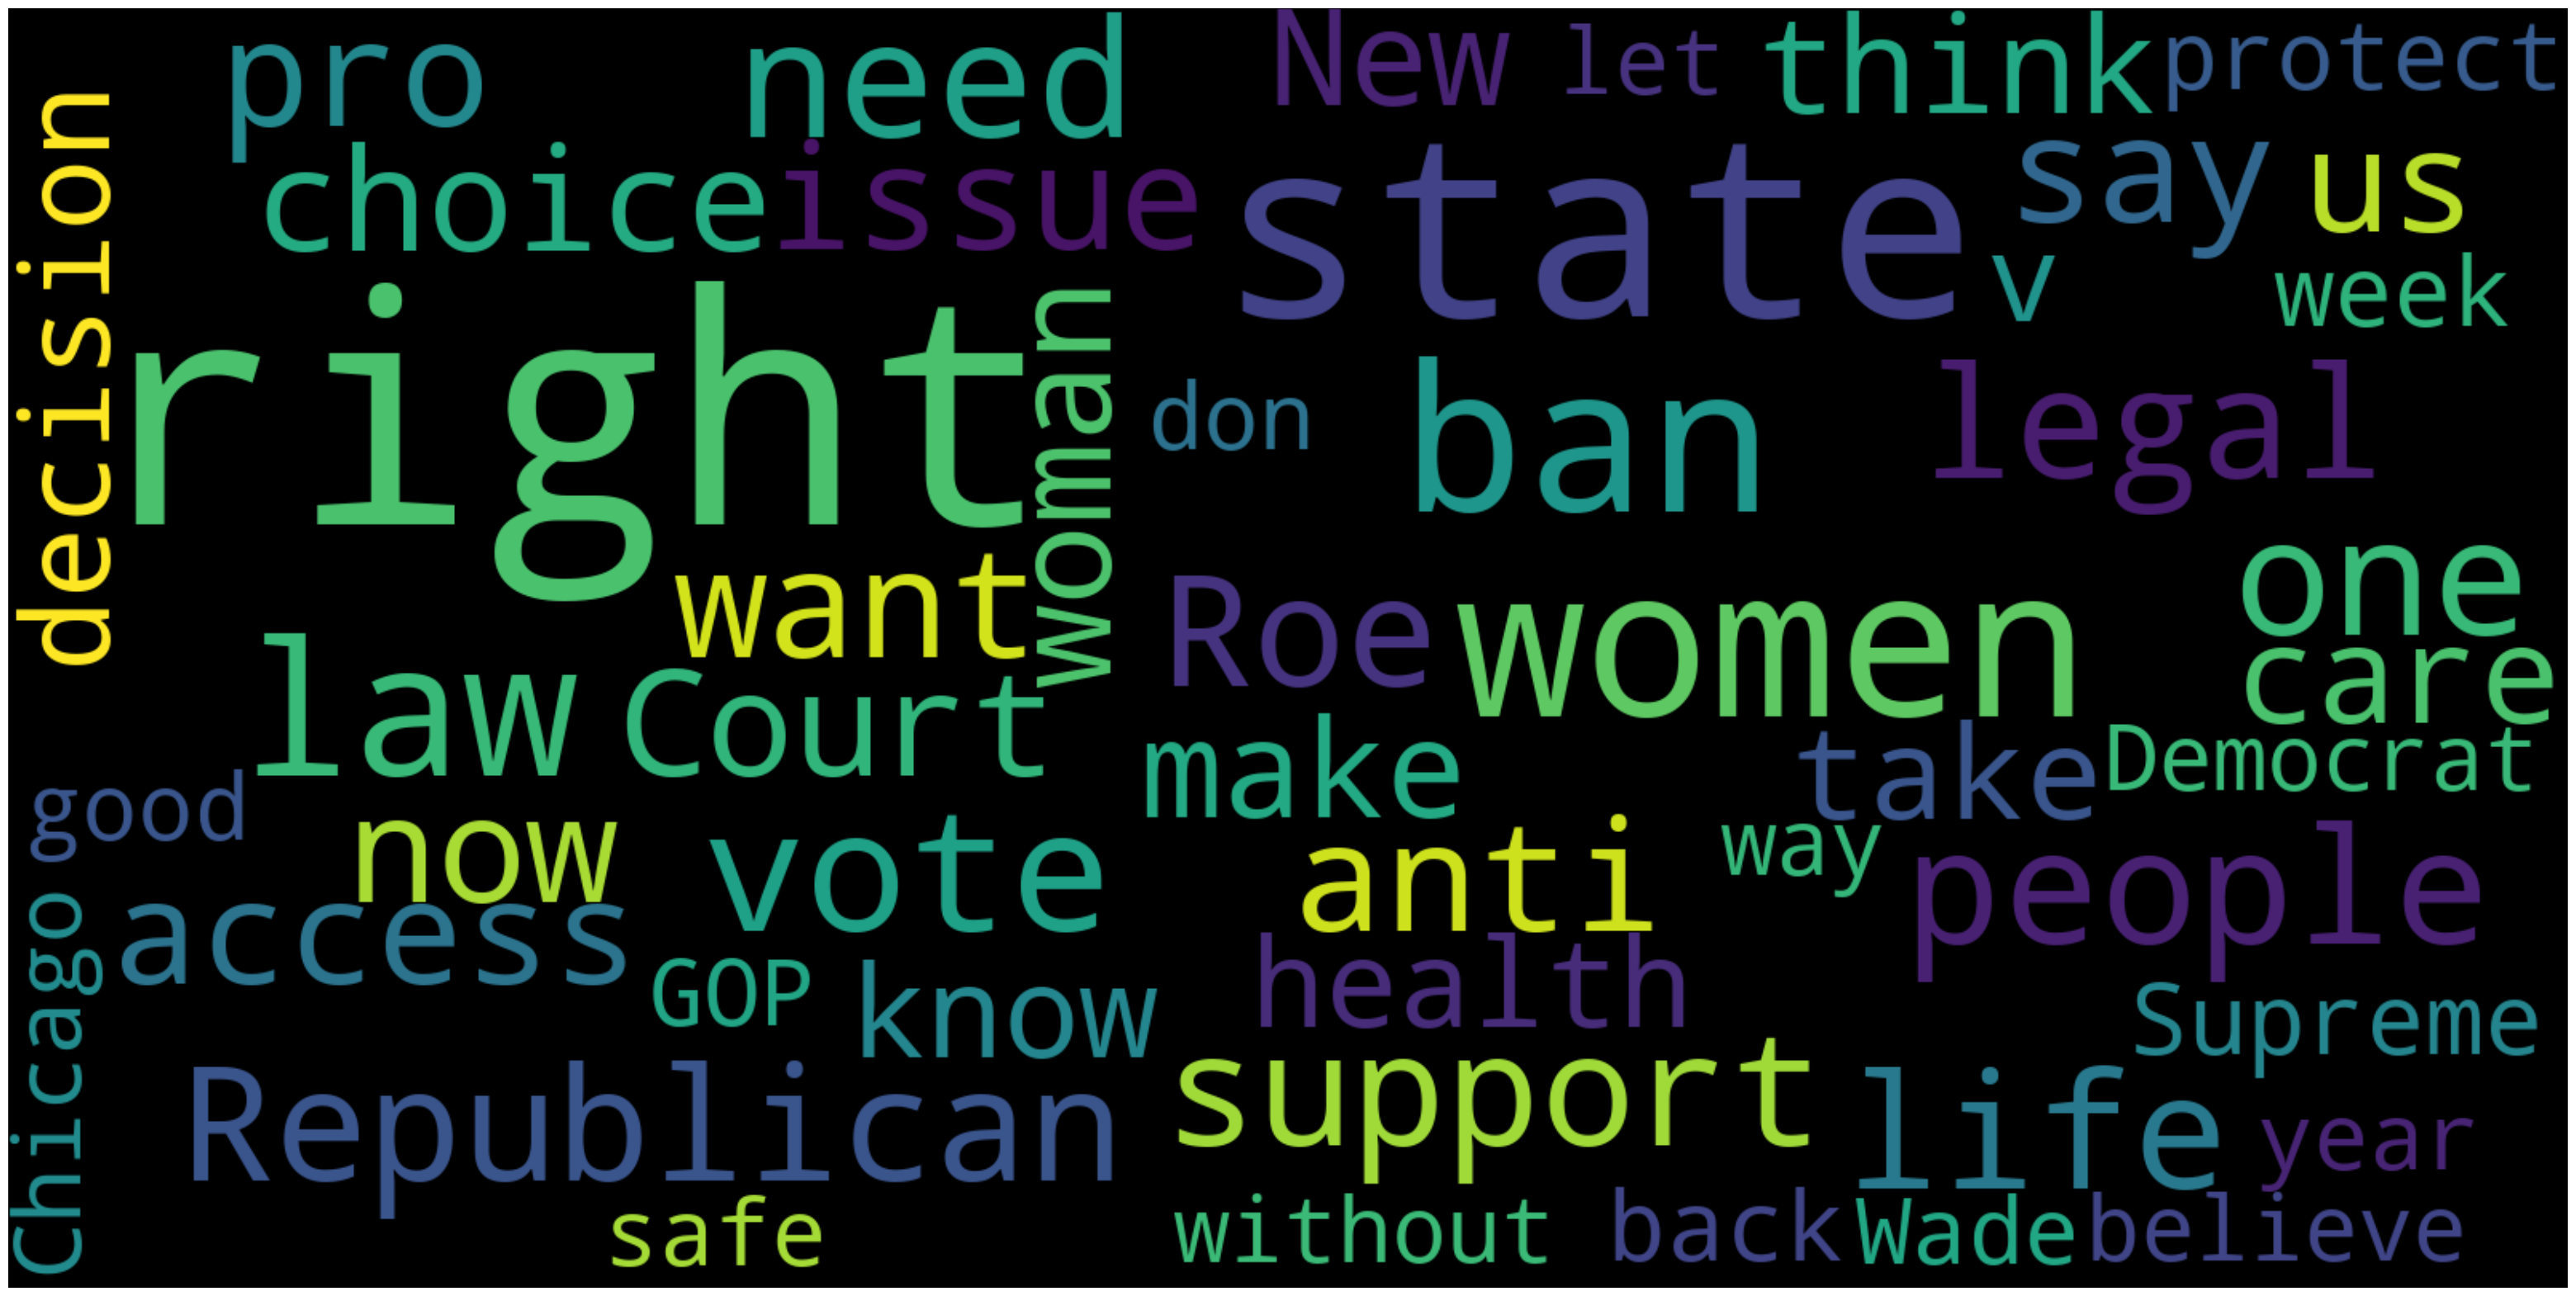

In [21]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string_neu)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()